# Logistic Regression

Logistic function:

$$ f(x)=\frac{1}{1 + e^{-x}} $$

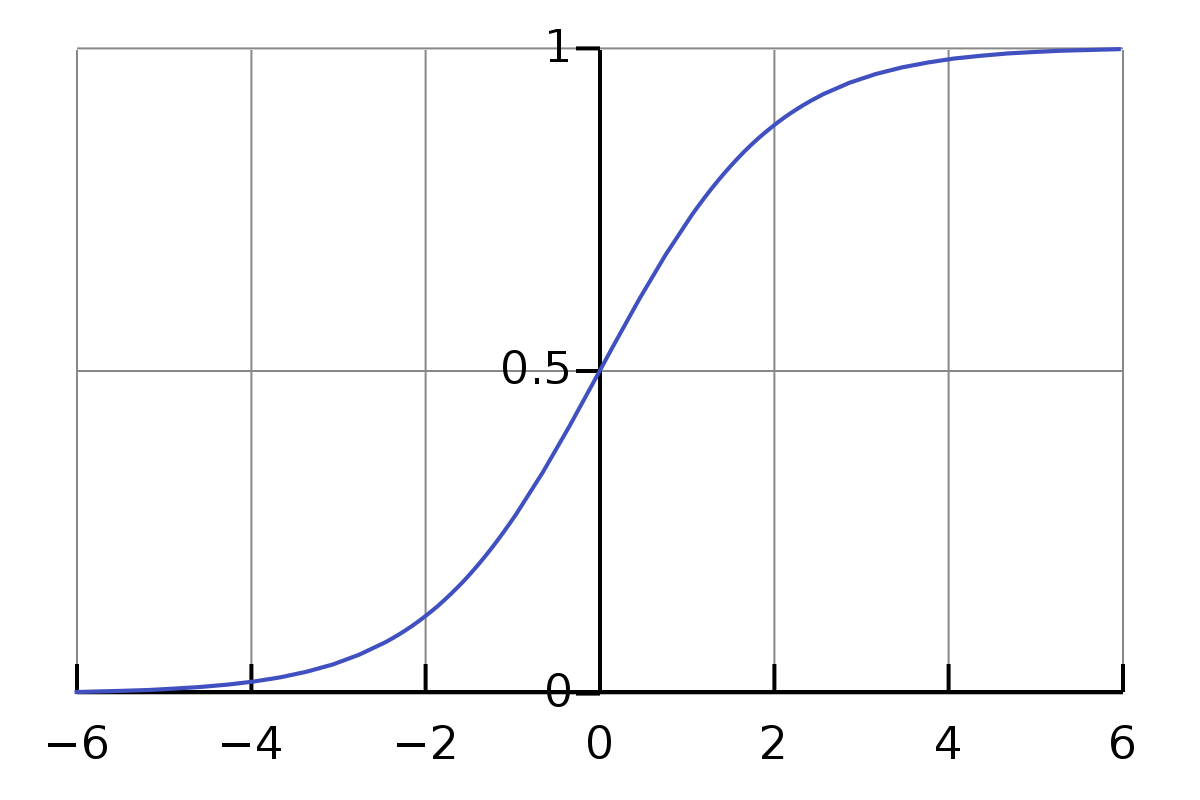

### Logistic Regression

In Logistic Regression, our aim is to predict a class (output) based on single or multiple attributes (inputs).

For one input $x_1$, the logistic function takes the form:

$$ f(x)=\frac{1}{1 + e^{-(b_0 + b_1x_1)}} $$

where $b_0$ is the bias and $b_1$ is the coefficient of $x_1$.

For multiple inputs $x_i \,\, (i=1,2,\ldots,n)$, the logistic function takes the form:

$$ f(x)=\frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n)}} $$

where $b_0$ is the bias and $b_i$ is the coefficient of $x_i$.

#### If the value of the function is greater than or equal to 0.5, then it is Class 1.

#### If the value of the function is less than 0.5, then it is Class 0.

### Interpretation of Logistic Regression in terms of Linear Regression

Rearranging the expression for multiple inputs, we get

$$ \ln{\frac{f(x)}{1-f(x)}} = b_0 + b_1x_1 + b_2x_2 + \ldots + b_nx_n $$

As we can interpret the output of logistic function as probabilities, we see that the natural logarithm of the odds of an event occuring is a linear combination of the inputs.

In [1]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('Desktop/Data/bank_marketing_processed2.csv')
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0,0.256419,1,0,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
1,0.288529,0,-0.437895,1,0,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
2,-0.747384,0,-0.446762,1,1,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
3,0.571051,0,0.047205,1,0,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1
4,-0.747384,0,-0.447091,0,0,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,...,0,0,0,1,0,0,0,0,0,1


In [15]:
data.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'education_secondary',
       'education_tertiary', 'education_unknown', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [16]:
# splitting input and target variables

X = data.drop('y', axis=1)
y = data['y']

In [17]:
# checking target variable distribution

y.value_counts()/y.value_counts().sum()

0    0.883015
1    0.116985
Name: y, dtype: float64

In [18]:
# import train_test_split class from Scikit-Learn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(31647, 42) (31647,) (13564, 42) (13564,)


In [20]:
# checking target variable distribution in train set

y_train.value_counts()/y_train.value_counts().sum()

0    0.881885
1    0.118115
Name: y, dtype: float64

In [21]:
# checking target variable distribution in test set

y_test.value_counts()/y_test.value_counts().sum()

0    0.885653
1    0.114347
Name: y, dtype: float64

In [22]:
# adding bias factor to the input variables

X_tr = X_train.copy()
X_tr['bias'] = 1
X_tr.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,bias
6149,-0.841558,1,-0.525587,1,0,1.344997,0.655614,-0.569351,-0.411453,-0.25194,...,0,0,1,0,0,0,0,0,1,1
12403,-0.653211,0,-0.604412,1,1,1.344997,-0.571452,0.399020,-0.411453,-0.25194,...,1,0,0,0,0,0,0,0,1,1
21645,-0.841558,0,-0.360055,1,0,0.383734,-0.350114,-0.246560,-0.411453,-0.25194,...,0,0,0,0,0,0,0,0,1,1
29580,-0.464863,1,-0.443150,0,1,-1.538792,-0.420010,0.399020,-0.411453,-0.25194,...,0,0,0,0,0,0,0,0,1,1
31245,-1.689124,0,-0.287799,0,0,-1.538792,-0.664647,-0.569351,-0.411453,-0.25194,...,0,1,0,0,0,0,0,0,1,1


In [23]:
# importing Logit class from StatsModels, and creating an object of the class

import statsmodels.api as sm

lr = sm.Logit(y_train,X_tr)

In [24]:
# fitting the model to the data

result = lr.fit()

Optimization terminated successfully.
         Current function value: 0.238149
         Iterations 8


In [25]:
print(result.summary2())

                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.344     
Dependent Variable:  y                 AIC:               15159.4341
Date:                2020-05-04 13:51  BIC:               15519.0172
No. Observations:    31647             Log-Likelihood:    -7536.7   
Df Model:            42                LL-Null:           -11493.   
Df Residuals:        31604             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
age                 -0.0183   0.0281  -0.6516 0.5146 -0.0734  0.0367
default             -0.2361   0.2074  -1.1381 0.2551 -0.6427  0.1705
balance              0.0507   0.0179   2.8347 0.0046  0.0156 

In [26]:
# dropping columns with p-value greater than 0.05

X_train_new = X_train.drop(['age','default','pdays','previous','education_unknown','job_unknown','marital_single', \
                            'contact_telephone','month_feb','poutcome_other','poutcome_unknown'], axis=1)

In [27]:
X_test_new = X_test.drop(['age','default','pdays','previous','education_unknown','job_unknown','marital_single', \
                          'contact_telephone','month_feb','poutcome_other','poutcome_unknown'], axis=1)

In [28]:
# importing Logistic Regression class from Scikit-Learn

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=3)

In [29]:
# fitting the model to the data

lr.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
lr.intercept_

array([-1.59306836])

In [31]:
lr.coef_

array([[ 0.05143711, -0.65532191, -0.41521193,  0.07852115,  1.10410676,
        -0.29029112,  0.17011853,  0.36569973, -0.32055213, -0.52540966,
        -0.5432266 , -0.17102487,  0.23755942, -0.30702324, -0.20590398,
         0.46899124, -0.18395874, -0.30511205, -0.23195024, -1.68788482,
        -0.63906645,  0.8418278 , -1.13737696, -0.78862247,  0.63233252,
         1.54524112, -0.28521945, -0.78632128,  1.04679024,  1.03047252,
         2.3079146 ]])

In [32]:
X_train_new.columns

Index(['balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'education_secondary', 'education_tertiary', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'contact_unknown', 'month_aug',
       'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_success'],
      dtype='object')

In [33]:
# making predictions on the test set

y_pred = lr.predict(X_test_new)

In [34]:
# importing performance metrics from Scikit-Learn

from sklearn.metrics import confusion_matrix, accuracy_score

### Classification Metrics

1) Confusion Matrix:

$$ \begin{matrix} & Predicted \; A & Predicted \; B \\ Actual \; A & TP & FN \\ Actual \; B & FP & TN \end{matrix}$$

2) Accuracy: $$ \frac{TP + TN}{FP + FN + TP + TN} $$

In [35]:
# computing the metrics for test set

cnf_mt = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Confusion Matrix:\n', cnf_mt, '\n\nAccuracy: ', acc)

Confusion Matrix:
 [[11702   311]
 [ 1025   526]] 

Accuracy:  0.9015039811265113


In [36]:
# model with all attributes as input

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

cnf_mt = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print('Confusion Matrix:\n', cnf_mt, '\n\nAccuracy: ', acc)

Confusion Matrix:
 [[11693   320]
 [ 1028   523]] 

Accuracy:  0.9006192863462106


### Classification Metrics

3) Precision: Of all the positive classes predicted by the classifier, how many are actually positive.

$$ \frac{TP}{TP+FP} $$

4) Recall: Of all the actual positive classes, how many are actually predicted positive by the classifier.

$$ \frac{TP}{TP+FN} $$

5) F1 Score: Harmonic Mean of Precision and Recall

In [37]:
from sklearn.metrics import recall_score, precision_score, f1_score

rec = recall_score(y_pred, y_test)
prec = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

print('Precision: ', prec, '\nRecall: ', rec, '\nF1 Score: ', f1)

Precision:  0.3372018052869117 
Recall:  0.6204033214709371 
F1 Score:  0.4369256474519633
